# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

## Подготовка данных

### Импортируем библиотеки и данные

Импортируем все необходимые библиотеки

In [20]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor

Загружаем данные

In [21]:
data = pd.read_csv('/datasets/autos.csv')

### Изучаем данные

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,14500,bus,2014,manual,125,c_max,30000,8,petrol,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,999,small,1998,manual,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


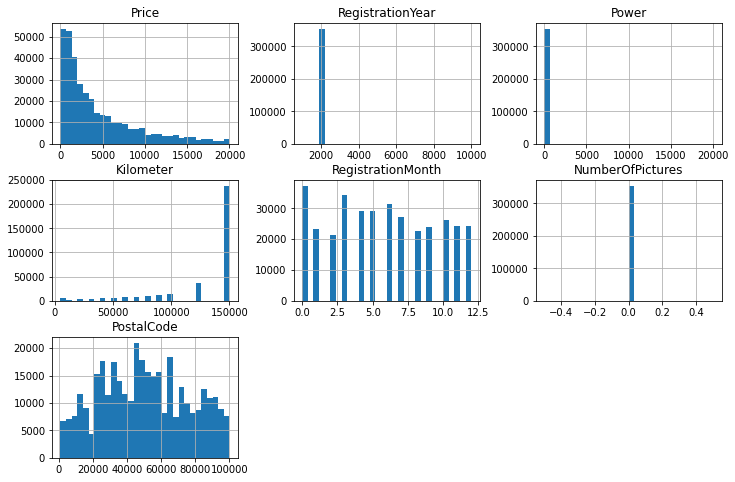

In [22]:
data.info()
data.hist(figsize=(12, 8), bins=30);
data.head(20)

In [23]:
print(data.describe())
data.corr()

               Price  RegistrationYear          Power      Kilometer  \
count  354369.000000     354369.000000  354369.000000  354369.000000   
mean     4416.656776       2004.234448     110.094337  128211.172535   
std      4514.158514         90.227958     189.850405   37905.341530   
min         0.000000       1000.000000       0.000000    5000.000000   
25%      1050.000000       1999.000000      69.000000  125000.000000   
50%      2700.000000       2003.000000     105.000000  150000.000000   
75%      6400.000000       2008.000000     143.000000  150000.000000   
max     20000.000000       9999.000000   20000.000000  150000.000000   

       RegistrationMonth  NumberOfPictures     PostalCode  
count      354369.000000          354369.0  354369.000000  
mean            5.714645               0.0   50508.689087  
std             3.726421               0.0   25783.096248  
min             0.000000               0.0    1067.000000  
25%             3.000000               0.0   30165.

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
Price,1.000000,0.026916,0.158872,-0.333199,0.110581,NaN,0.076055
RegistrationYear,0.026916,1.000000,-0.000828,-0.053447,-0.011619,NaN,-0.003459
Power,0.158872,-0.000828,1.000000,0.024002,0.043380,NaN,0.021665
Kilometer,-0.333199,-0.053447,0.024002,1.000000,0.009571,NaN,-0.007698
RegistrationMonth,0.110581,-0.011619,0.043380,0.009571,1.000000,NaN,0.013995
NumberOfPictures,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PostalCode,0.076055,-0.003459,0.021665,-0.007698,0.013995,NaN,1.000000


In [24]:
data.Brand.unique()

array(['volkswagen', 'audi', 'jeep', 'skoda', 'bmw', 'peugeot', 'ford',
       'mazda', 'nissan', 'renault', 'mercedes_benz', 'opel', 'seat',
       'citroen', 'honda', 'fiat', 'mini', 'smart', 'hyundai',
       'sonstige_autos', 'alfa_romeo', 'subaru', 'volvo', 'mitsubishi',
       'kia', 'suzuki', 'lancia', 'toyota', 'chevrolet', 'dacia',
       'daihatsu', 'trabant', 'saab', 'chrysler', 'jaguar', 'daewoo',
       'porsche', 'rover', 'land_rover', 'lada'], dtype=object)

Анализируем данные по колонкам: 


- DateCreated — дата создания анкеты, PostalCode — почтовый индекс владельца анкеты, DateCrawled - дата скачивания анкеты из базы, LastSeen — дата последней активности пользователя. Предсказания на основе этих данных будут не совсем адекватны, уберём


- Describe и hist показывают, что столбец NumberOfPictures состоит из одних нулей. По всей видимости, что-то сломалось, когда данные переводили в числовой вид. Удалим этот столбец, но стоит выяснить, в чём причина сбоя у тех, кто собирал данные.


- Значения в признаке RegistrationYear - от 1000 до 9999, хотя большая часть, судя по гисторграмме, имеет реалистичное значение около 2000 - найдем интервал адекватных значений, неадекватные удалим


- В столбце RegistrationMonth значения от 0 до 12 - в сумме получается 13. Где-то считали первый месяц как '0' (как принято), а где-то как '1'. Понять как именно - мы не сможем, так что этот столбец мы удалим - года регистрации хватит, а данные о месяце возможно и не были бы так полезны


- Kilometr - пропусков нет, все значения лежат в адекватном интервале


- Brand - всё в порядке


- Пропуски имеются в пяти колонках: VehicleType, Gearbox, Model, FuelType и Repaired. Пропуски в Repaired мы не сможем заполнить - информация о том, был ли автомобиль в ремонте, индивидуальная для каждого авто - поставим заглушку. Пропуски в Model - удалим после того, как сделаем всё возможное, чтобы заполнить остальные данные. А пропуски в Gearbox, VehicleType и FuelType можно заполнить, сгруппировав по колонкам Brand и Model для тех строк, где нет пропуска в Model


- Видим значения '0' в столбцах 'Price' и 'Power' - такого быть не может, нужно удалить или изменить


-  В признаке FuelType есть значения 'petrol' и 'gasoline' - оба слова означают бензин на разных диалектах английского, объединим их под именем 'petrol'


- Сильных корреляций не обнаружено

### Удаляем аномалии, заполняем пропуски

Прежде, чем удалять или менять какие-либо признаки, проверим данные на явные дубликаты. Если это сделать после, то в явные дубликаты могут попасть данные, которые изначально были разными

In [25]:
data.duplicated().sum()

4

Удаляем явные дубликаты

In [26]:
data = data.drop_duplicates()
data.duplicated().sum()

0

Удаляем признаки, которые решили отбросить в предыдущем пункте

In [27]:
data = data.drop(['DateCreated', 'PostalCode', 'DateCrawled', 'LastSeen', 'NumberOfPictures', 'RegistrationMonth'], axis=1)

data.head()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired
0,480,NaN,1993,manual,0,golf,150000,petrol,volkswagen,NaN
1,18300,coupe,2011,manual,190,NaN,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,NaN
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no


#### Удаляем аномалии

Определяем адекватный промежуток для признака RegistrationYear

<AxesSubplot:>

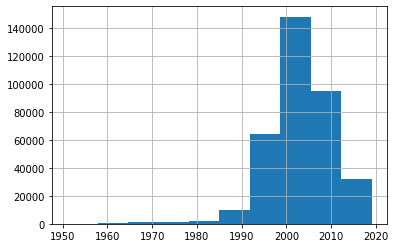

In [28]:
data.query('1950 < RegistrationYear < 2023').RegistrationYear.hist()

На основе гистограммы возьмём 1960 год как нижнюю границу и 2016 как верхнюю

In [29]:
data = data.query('1960 < RegistrationYear < 2017')

Меняем тип топлива 'gasoline' на 'petrol'

In [30]:
print(data.FuelType.value_counts())

data.FuelType = np.where(data.FuelType == 'gasoline', 'petrol', data.FuelType)

data.FuelType.value_counts()

petrol      209705
gasoline     96287
lpg           5158
cng            542
hybrid         224
other          192
electric        89
Name: FuelType, dtype: int64


petrol      305992
lpg           5158
cng            542
hybrid         224
other          192
electric        89
Name: FuelType, dtype: int64

Посмотрим на "нули" и другие низкие значения в Price и Power

0     9887
1     1094
2       10
3        7
4        1
5       26
7        3
8        9
9        8
10      82
11       5
12       8
13       7
14       4
15      25
16       2
17       5
18       2
19       3
20      46
Name: Price, dtype: int64

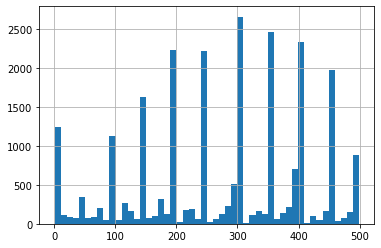

In [31]:
data.query('0 < Price < 500').Price.hist(bins=50)
data.Price.value_counts().sort_index().head(20)

In [32]:
data.Power.value_counts().sort_index().head(20)

0     36137
1        30
2        10
3         8
4        30
5       102
6        11
7        11
8         6
9         4
10       12
11       27
12       14
13        6
14       19
15       15
16        6
17        7
18       48
19       10
Name: Power, dtype: int64

Значения цены меньше 200 отбросим - сервис продаёт машины, а не отдаёт в добрые руки. А вот Power меньше 50 попробуем перевести в NaN и заполнить как и другие пропуски, по модели авто, таким образом даже если в данных есть микрокары мы их не затронем

In [33]:
data.Power = data.Power.where(data.Power>51, np.nan)
data = data.query('Price > 199')
data.query('Power < 50')

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired


<class 'pandas.core.frame.DataFrame'>
Int64Index: 322884 entries, 0 to 354368
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Price             322884 non-null  int64  
 1   VehicleType       305220 non-null  object 
 2   RegistrationYear  322884 non-null  int64  
 3   Gearbox           309138 non-null  object 
 4   Power             283690 non-null  float64
 5   Model             308303 non-null  object 
 6   Kilometer         322884 non-null  int64  
 7   FuelType          300971 non-null  object 
 8   Brand             322884 non-null  object 
 9   Repaired          266493 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 27.1+ MB


<AxesSubplot:>

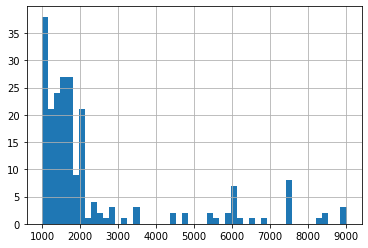

In [34]:
data.info()
data.query('1000 < Power < 10000').Power.hist(bins=50)

Также в признаке Power оставим только те объекты, у которых лошадиная сила меньше 2000

In [35]:
data = data.query('Power < 2000 or Power != Power')

data.query('Power > 2000')

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322784 entries, 0 to 354368
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Price             322784 non-null  int64  
 1   VehicleType       305127 non-null  object 
 2   RegistrationYear  322784 non-null  int64  
 3   Gearbox           309042 non-null  object 
 4   Power             283590 non-null  float64
 5   Model             308215 non-null  object 
 6   Kilometer         322784 non-null  int64  
 7   FuelType          300890 non-null  object 
 8   Brand             322784 non-null  object 
 9   Repaired          266433 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 27.1+ MB


#### Заполняем пропуски

Изучаем пропуски

In [37]:
data.isna().sum()

Price                   0
VehicleType         17657
RegistrationYear        0
Gearbox             13742
Power               39194
Model               14569
Kilometer               0
FuelType            21894
Brand                   0
Repaired            56351
dtype: int64

Пропуски имеются в шести признаках: VehicleType, Gearbox, Power, Model, FuelType и Repaired. Пропуски в Repaired мы не сможем заполнить - информация о том, был ли автомобиль в ремонте, индивидуальная для каждого авто. А пропуски в Power, Gearbox, VehicleType и FuelType можно заполнить исходя из колонок Brand и Modell.

In [38]:
data['VehicleType'] = data.groupby(by=['Brand', 'Model'], dropna=False)['VehicleType'].apply(lambda x: x.fillna(x.mode()[0]))

data['FuelType'] = data.groupby(by=['Brand', 'Model'], dropna=False)['FuelType'].apply(lambda x: x.fillna(x.mode()[0]))

data['Power'] = data.groupby(by=['Brand', 'Model'], dropna=False)['Power'].apply(lambda x: x.fillna(x.idxmax()))

data['Gearbox'] = data.groupby(by=['Brand', 'Model'], dropna=False)['Gearbox'].apply(lambda x: x.fillna(x.mode()[0]))

data.isna().sum()

Price                   0
VehicleType             0
RegistrationYear        0
Gearbox                 0
Power                 330
Model               14569
Kilometer               0
FuelType                0
Brand                   0
Repaired            56351
dtype: int64

Количество пропусков в Gearbox стало больше, чем до заполнения, но есть важная деталь - это не те же пропуски, к которым просто добавились новые. Если не проводить такое заполнение, пропуски будут в случайных объектах, а заполнив их таким способом мы заполнили их где возможно, но оставили их и сделали новые в тех объектах, которые позже отфильтруем при помощи .dropna(), в чём сейчас и убедимся.

Заполним пропуски в признаке Repaired на 'unknown', удалим все оставшиеся пропуски и обновим индексы

In [39]:
data.Repaired = data.Repaired.fillna('unknown')

data = data.dropna().reset_index(drop=True)

data.info()

data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307885 entries, 0 to 307884
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Price             307885 non-null  int64  
 1   VehicleType       307885 non-null  object 
 2   RegistrationYear  307885 non-null  int64  
 3   Gearbox           307885 non-null  object 
 4   Power             307885 non-null  float64
 5   Model             307885 non-null  object 
 6   Kilometer         307885 non-null  int64  
 7   FuelType          307885 non-null  object 
 8   Brand             307885 non-null  object 
 9   Repaired          307885 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 23.5+ MB


,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired
0,480,sedan,1993,manual,28942.0,golf,150000,petrol,volkswagen,unknown
1,9800,suv,2004,auto,163.0,grand,125000,petrol,jeep,unknown
2,1500,small,2001,manual,75.0,golf,150000,petrol,volkswagen,no
3,3600,small,2008,manual,69.0,fabia,90000,petrol,skoda,no
4,650,sedan,1995,manual,102.0,3er,150000,petrol,bmw,yes


## Обучение моделей

Обозначаем категориальные признаки

In [40]:
data.info()
cat_features = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'Repaired']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307885 entries, 0 to 307884
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Price             307885 non-null  int64  
 1   VehicleType       307885 non-null  object 
 2   RegistrationYear  307885 non-null  int64  
 3   Gearbox           307885 non-null  object 
 4   Power             307885 non-null  float64
 5   Model             307885 non-null  object 
 6   Kilometer         307885 non-null  int64  
 7   FuelType          307885 non-null  object 
 8   Brand             307885 non-null  object 
 9   Repaired          307885 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 23.5+ MB


Меняем тип признаков object на тип category

In [41]:
for feature in cat_features:
    data[feature] = data[feature].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307885 entries, 0 to 307884
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Price             307885 non-null  int64   
 1   VehicleType       307885 non-null  category
 2   RegistrationYear  307885 non-null  int64   
 3   Gearbox           307885 non-null  category
 4   Power             307885 non-null  float64 
 5   Model             307885 non-null  category
 6   Kilometer         307885 non-null  int64   
 7   FuelType          307885 non-null  category
 8   Brand             307885 non-null  category
 9   Repaired          307885 non-null  category
dtypes: category(6), float64(1), int64(3)
memory usage: 11.5 MB


Разбиваем данные на тренировочную и тестовую выборки

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('Price', axis=1), data.Price, test_size=0.2, random_state=113)

Создаём модели

### CatBoostRegressor

Алгоритм CatBoost очень удобен в обращении, начнём с него. Чтобы не подберать параметры слишком долго, подберём ему только максимальную глубину

In [48]:
cat = CatBoostRegressor(loss_function='RMSE', iterations=201, learning_rate=0.1,
                            cat_features=cat_features, random_state=113, verbose=100)
param_grid = {
    'depth': [10, 12, 14]
}

Запускаем пербор параметров встроенной функцией

In [49]:
%%time
grid_cat = cat.grid_search(param_grid, X_train, y_train, cv=4, partition_random_seed=113)

0:	learn: 6033.7845164	test: 6010.0921761	best: 6010.0921761 (0)	total: 732ms	remaining: 2m 26s
100:	learn: 1632.4411305	test: 1658.8306587	best: 1658.8306587 (100)	total: 40.7s	remaining: 40.3s
200:	learn: 1537.7968332	test: 1598.4177447	best: 1598.4177447 (200)	total: 1m 23s	remaining: 0us

bestTest = 1598.417745
bestIteration = 200

0:	loss: 1598.4177447	best: 1598.4177447 (0)	total: 1m 24s	remaining: 2m 48s
0:	learn: 6027.5667753	test: 6003.3506754	best: 6003.3506754 (0)	total: 787ms	remaining: 2m 37s
100:	learn: 1551.4539604	test: 1613.2382889	best: 1613.2382889 (100)	total: 58.2s	remaining: 57.6s
200:	learn: 1449.6097200	test: 1564.6594947	best: 1564.6594947 (200)	total: 1m 59s	remaining: 0us

bestTest = 1564.659495
bestIteration = 200

1:	loss: 1564.6594947	best: 1564.6594947 (1)	total: 3m 23s	remaining: 1m 41s
0:	learn: 6025.9451699	test: 6001.8065943	best: 6001.8065943 (0)	total: 1.23s	remaining: 4m 6s
100:	learn: 1481.3384953	test: 1592.9209095	best: 1592.9209095 (100)	total:

In [50]:
%%time
train_cat = %timeit -n1 -r1 -o cat.copy().fit(X_train, y_train)

0:	learn: 4212.0141982	total: 1.05s	remaining: 3m 30s
100:	learn: 1479.6905952	total: 1m 46s	remaining: 1m 45s
200:	learn: 1371.4386863	total: 3m 36s	remaining: 0us
3min 37s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
CPU times: user 3min 30s, sys: 6.56 s, total: 3min 37s
Wall time: 3min 37s


In [51]:
%%time
predict_cat = %timeit -n1 -r1 -o cat.predict(X_train)

938 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
CPU times: user 937 ms, sys: 162 µs, total: 937 ms
Wall time: 939 ms


Модель с лучшим показателем на тесте обучается четыре минуты. Сравним метрики и время обучения с другими моделями

### LightGBM

Теперь обучим и подберём параметры алгоритму LightGBM 

In [44]:
est_lgb = LGBMRegressor(metric='RMSE', learning_rate=0.1, random_state=113)
param_grid = {
    'num_leaves': [31, 52, 64]
}
lgb = GridSearchCV(est_lgb, param_grid, scoring='neg_root_mean_squared_error', cv=4, verbose=2)

In [45]:
%%time
lgb.fit(X_train, y_train)
print(f'Лучшие параметры - {lgb.best_params_}, лучший результат - {-1 * lgb.best_score_}')

Fitting 4 folds for each of 3 candidates, totalling 12 fits
[CV] END ......................................num_leaves=31; total time= 7.2min
[CV] END ......................................num_leaves=31; total time=10.8min
[CV] END ......................................num_leaves=31; total time= 3.2min
[CV] END ......................................num_leaves=31; total time= 4.7min
[CV] END ......................................num_leaves=52; total time=29.1min
[CV] END ......................................num_leaves=52; total time=28.7min
[CV] END ......................................num_leaves=52; total time=27.3min
[CV] END ......................................num_leaves=52; total time=34.6min
[CV] END ......................................num_leaves=64; total time=33.3min
[CV] END ......................................num_leaves=64; total time=34.2min
[CV] END ......................................num_leaves=64; total time=33.6min
[CV] END ......................................nu

In [46]:
%%time
train_lgb = %timeit -n1 -r1 -o lgb.best_estimator_.fit(X_train, y_train)

2min 48s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
CPU times: user 2min 47s, sys: 303 ms, total: 2min 47s
Wall time: 2min 48s


In [47]:
%%time
predict_lgb = %timeit -n1 -r1 -o lgb.predict(X_train)

2.9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
CPU times: user 2.91 s, sys: 2.8 ms, total: 2.91 s
Wall time: 2.9 s


Лучший результат чуть хуже, чем у CatBoost, но и модель намного менее сложная, а скорость обучения многократно выше. Но скорость предсказания выше у CatBoost

### RandomForestRegressor

Обычные модели, в отличие от моделей градиентного бустинга CatBoost и LightGBM, не умеют работать с категориальными признаками. Преобразуем их в численные

In [52]:
enc = OrdinalEncoder()
X_train[cat_features] = enc.fit_transform(X_train[cat_features])

Объявляем модель и гиперпараметры

In [53]:
est_forest = RandomForestRegressor(random_state=113)
param_grid = {
    'max_depth': [10, 14, 18]
}
forest = GridSearchCV(est_forest, param_grid, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=4, verbose=2)

Настраиваем

In [54]:
%%time
forest.fit(X_train, y_train)
print(f'Лучшие параметры - {forest.best_params_}, лучший результат - {-1 * forest.best_score_}')

Fitting 4 folds for each of 3 candidates, totalling 12 fits
[CV] END .......................................max_depth=10; total time=  22.2s
[CV] END .......................................max_depth=10; total time=  21.8s
[CV] END .......................................max_depth=10; total time=  22.0s
[CV] END .......................................max_depth=10; total time=  22.2s
[CV] END .......................................max_depth=14; total time=  28.8s
[CV] END .......................................max_depth=14; total time=  28.7s
[CV] END .......................................max_depth=14; total time=  28.5s
[CV] END .......................................max_depth=14; total time=  28.6s
[CV] END .......................................max_depth=18; total time=  35.1s
[CV] END .......................................max_depth=18; total time=  35.0s
[CV] END .......................................max_depth=18; total time=  34.8s
[CV] END .......................................m

In [55]:
%%time
train_forest = %timeit -n1 -r1 -o forest.best_estimator_.fit(X_train, y_train)

45.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
CPU times: user 45 s, sys: 337 ms, total: 45.4 s
Wall time: 45.4 s


In [56]:
%%time
predict_forest = %timeit -n1 -r1 -o forest.predict(X_train)

5.47 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
CPU times: user 5.46 s, sys: 4.76 ms, total: 5.47 s
Wall time: 5.47 s


Модель на удивление не так далека по своим результатам от градиентного бустинга, и обучается довольно быстро. В перспективе у  моделей бустинга потенциал возможностей выше, но в тесте где мы меняем только один гиперпарметр модели она показывает хороший результат и обучается быстрее CatBoost'а

### Результаты обучения

In [66]:
pd.DataFrame(data={'CatBoost': [grid_cat['cv_results']['test-RMSE-mean'][-1], train_cat.average, predict_cat.average],
                   'LightGBM': [-1 * lgb.best_score_, train_lgb.average, predict_lgb.average],
                   'RandomForestRegressor': [-1 * forest.best_score_, train_forest.average, predict_forest.average]},
             index=['Точность предсказания, RMSE', 'Скорость обучения, сек.', 'Скорость предсказания, сек.'])

,CatBoost,LightGBM,RandomForestRegressor
"Точность предсказания, RMSE",1566.214705,1573.300456,1600.502033
"Скорость обучения, сек.",217.757035,168.108602,45.397321
"Скорость предсказания, сек.",0.938037,2.903692,5.470800


Лучшее предсказание нам дал алгоритм CatBoost, алгоритм LightGBM почти не уступил по точности, RandomForestRegressor тоже не отстал. По времени обучения обратная картина - быстрее всех RandomForestRegressor, затем LightGBM и CatBoost. Со скоростью предсказания CatBoost справился лучше всех, поэтому этот алгоритм признаем самым лучшим из рассматриевымых.

## Анализ моделей

Посмотрим на результат лучшего алгоритма на тестовых данных

In [64]:
%time
mean_squared_error(y_test, cat.predict(X_test), squared=False)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs


1566.9703734353989

Результат почти такой же, как на тренировочных данных, и получен очень быстро. Как уже было отмечено, алгоритм долго обучается, но точность и скорость предсказания - его сильные стороны.

## Общий вывод

В ходе выполнения задачи мы обнаружили пропуски и аномалии в данных и проблемы с переносом количества фотографий в данные. Удалили аномалии и часть пропусков, другую часть заполнили. Хорошие данные передали алгоритмам CatBoost и LightGBM, а так же модели RandomForestRegressor. В ходе обучения выяснили, что алгоритмы градиентного бустинга лучше справляются с поставленной задачей. По трём задачам заказчика - точности предсказания, скорости обучения и скорости предсказания, скажем следующее: алгоритм CatBoost быстрее предсказывает, а LightGBM быстрее обучается, по точности предсказания они примерно одинаковы